EDA and Feature Engineering on Used Car Prices Data

In [37]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/10.7 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/10.7 MB 1.8 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/10.7 MB 1.6 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/10.7 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/10.7 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/10.7 MB 1.7 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/10.7 MB 1.6 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/10.7 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/10.7 MB 1.6 MB/s eta 0:00:05
   ---------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\akhil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#Importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set(style='ticks', font_scale=1.2)

warnings.filterwarnings('ignore')

In [2]:
#Importing Data

df=pd.read_csv(r"C:\Users\akhil\Documents\Data analysis\DA Assignment (Unified Mentor)\Projects\Project 1\bikes.csv")

In [3]:
#Inspecting the data

df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [5]:
df.shape

(7857, 8)

In [6]:
#Data cleaning

#Checking missing values

print(df.isnull().sum())

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [7]:
#Replace missing values with nan

df.replace(['?', 'N/A', 'na', 'NA', '', 'None', 'null'], np.nan, inplace=True)


In [8]:
#Dropping missing values for simplicity

df_cleaned=df.dropna()

In [9]:
#Rechecking the number of rows and columns
df_cleaned.shape

(7796, 8)

EXPLORATORY DATA ANALYSIS(EDA)

Descriptive Stattistics:

In [10]:

df_cleaned.describe()

,model_year,price
count,7796.000000,7.796000e+03
mean,2015.405849,1.060233e+05
std,3.854537,1.364439e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [11]:
print(df['kms_driven'].unique()[:20])  # Or df_cleaned before any cleaning


['17000 Km' '50000 Km' '14795 Km' 'Mileage 28 Kms' '2000 Km' '24561 Km'
 '19718 Km' 'Mileage 40 Kmpl' '1350 Km' 'Mileage 58 Kmpl' '25000 Km'
 '26240 Km' '18866 Km' 'Mileage 65 Kmpl' 'Mileage 30 Kmpl'
 'Mileage 42 Kmpl' '12634 Km' 'Mileage 37 Kmpl' '13000 Km' '28000 Km']


In [12]:

# Step 1: Ensure string
df_cleaned['kms_driven'] = df_cleaned['kms_driven'].astype(str)

# Step 2: Keep only rows that contain 'Km' but NOT 'Mileage'
df_cleaned = df_cleaned[df_cleaned['kms_driven'].str.contains('Km', na=False) & ~df_cleaned['kms_driven'].str.contains('Mileage', na=False)]

# Step 3: Remove all non-digit characters and convert to numeric
df_cleaned['kms_driven'] = (
    df_cleaned['kms_driven']
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+)')[0]  # extract digits only
    .astype(float)
)


In [13]:
print(df_cleaned['kms_driven'].describe())


count       5813.000000
mean       23069.798727
std        28756.835382
min            0.000000
25%         8900.000000
50%        17000.000000
75%        30000.000000
max      1000000.000000
Name: kms_driven, dtype: float64


Univariate Analysis:

In [14]:
# Convert columns to numeric (clean strings and extract numbers)
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['mileage'] = df_cleaned['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_cleaned['power'] = df_cleaned['power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_cleaned['kms_driven'] = pd.to_numeric(df_cleaned['kms_driven'], errors='coerce')


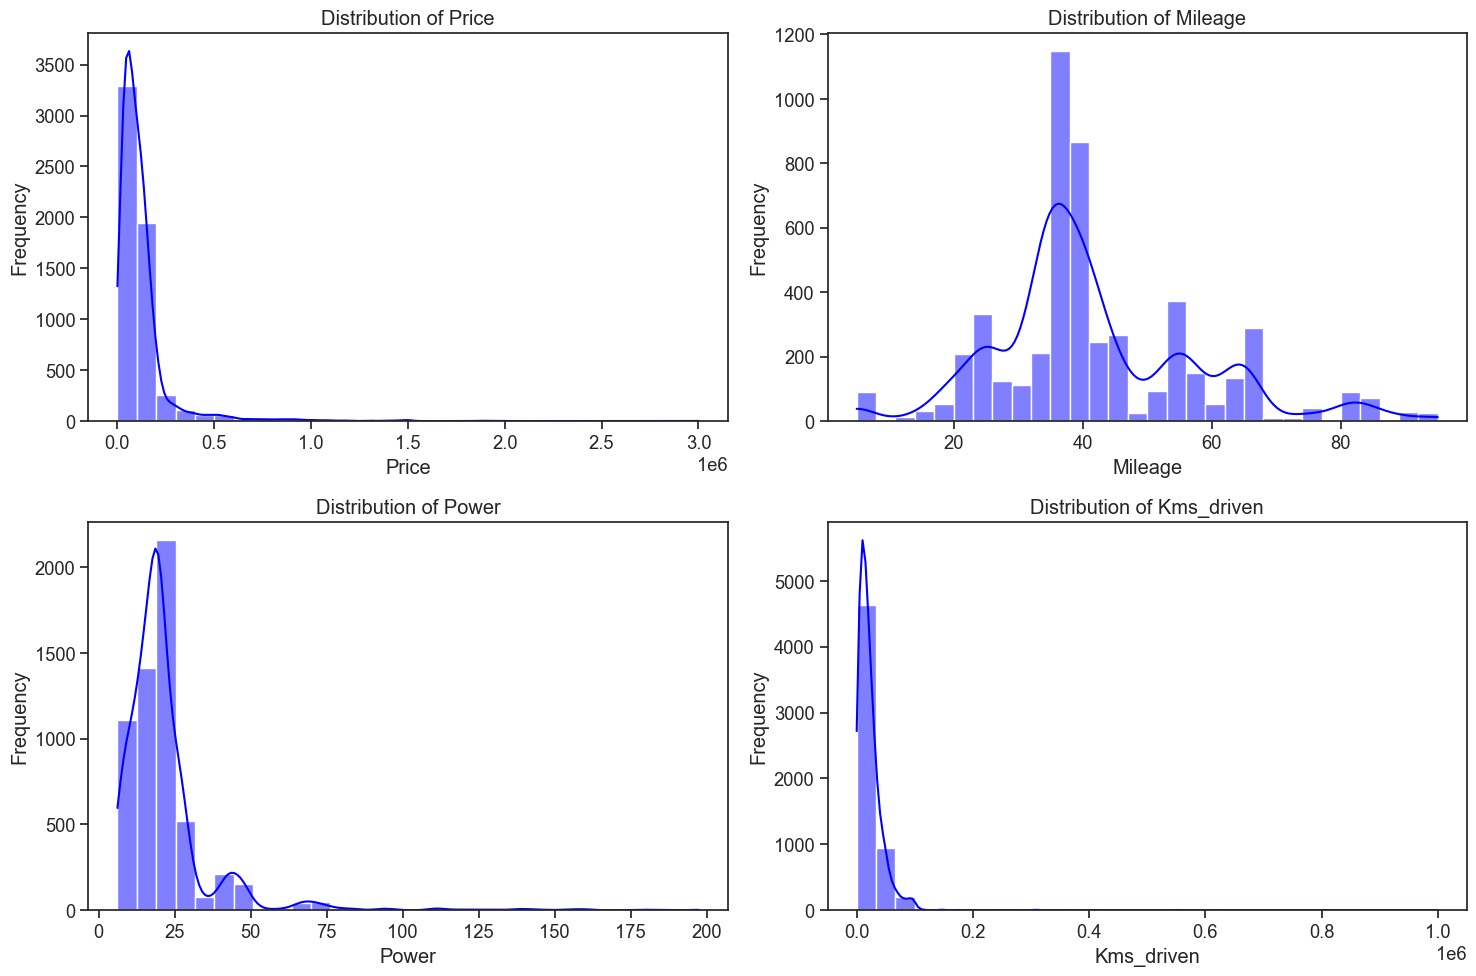

In [15]:
# Plot histograms
continuous_vars = ['price', 'mileage', 'power','kms_driven']
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
print(df_cleaned[['price', 'mileage', 'power', 'kms_driven']].info())
print(df_cleaned[['price', 'mileage', 'power', 'kms_driven']].describe())


<class 'pandas.core.frame.DataFrame'>
Index: 5816 entries, 0 to 7856
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       5816 non-null   int64  
 1   mileage     5082 non-null   float64
 2   power       5816 non-null   float64
 3   kms_driven  5813 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 227.2 KB
None
              price      mileage        power      kms_driven
count  5.816000e+03  5082.000000  5816.000000     5813.000000
mean   1.181404e+05    41.715289    21.764947    23069.798727
std    1.458866e+05    15.946040    16.453051    28756.835382
min    0.000000e+00     5.000000     6.150000        0.000000
25%    4.700000e+04    35.000000    14.300000     8900.000000
50%    8.500000e+04    38.950000    19.800000    17000.000000
75%    1.370000e+05    52.000000    24.600000    30000.000000
max    3.000000e+06    95.000000   197.300000  1000000.000000


Bivariate Analysis:

1.Price Vs Model year
2.Price Vs kms_driven

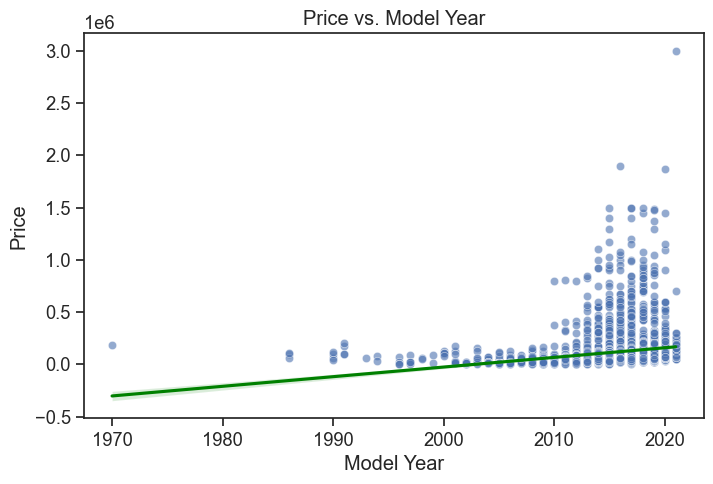

In [17]:
#Scatterplot-Price Vs Model year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='model_year', y='price', data=df_cleaned, alpha=0.6)
sns.regplot(x='model_year', y='price', data=df_cleaned, scatter=False, color='green')
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


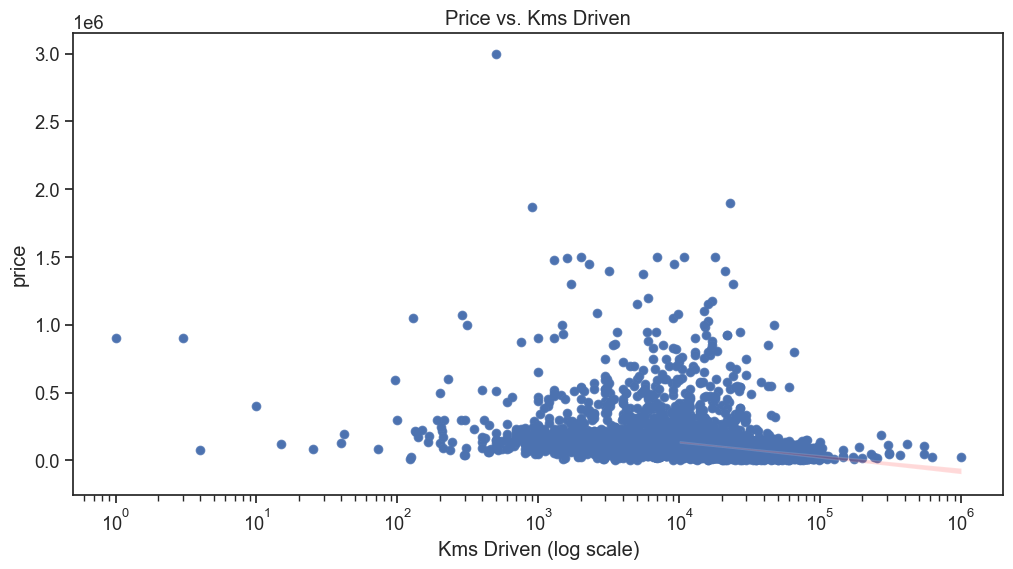

In [18]:
#Scatterplot - Price Vs kms driven

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='kms_driven', y='price')
sns.regplot(data=df_cleaned, x='kms_driven', y='price', scatter=True, logx=True, line_kws={"color":"red"})


plt.xscale('log')  # Use logarithmic scale for better spacing
plt.title('Price vs. Kms Driven')
plt.xlabel('Kms Driven (log scale)')
plt.show()


Feature Engineering:

1.Creating New Features

○ Age of Bike: Calculate based on model_year and the current year.

○ Power-to-Weight Ratio: For bikes where both power and cc are
available, create a ratio feature.

○ Location Encoding: Use encoding techniques to convert location to a
numerical format.

In [19]:
#Age of Bike

df_cleaned['age'] = 2025 - df_cleaned['model_year']


In [20]:
from datetime import datetime
df_cleaned['age'] = datetime.now().year - df_cleaned['model_year']


In [21]:
import re

# Extract cc from name using regex
df_cleaned['cc_extracted'] = df_cleaned['model_name'].str.extract(r'(\d{2,3})').astype(float)

# Calculate ratio only where both values are available
df_cleaned['power_to_cc_ratio'] = df_cleaned.apply(
    lambda row: row['power'] / row['cc_extracted']
    if pd.notnull(row['power']) and pd.notnull(row['cc_extracted']) else None,
    axis=1
)




In [22]:
#Location encoding

location_freq = df_cleaned['location'].value_counts().to_dict()
df_cleaned['location_freq'] = df_cleaned['location'].map(location_freq)

#print(location_freq)


#Lowercase locations to ensure matching
df_cleaned['location'] = df_cleaned['location'].str.lower()

#Map frequencies
df_cleaned['location_freq'] = df_cleaned['location'].map(location_freq)

df_cleaned.head()





,model_name,model_year,kms_driven,owner,location,mileage,power,price,age,cc_extracted,power_to_cc_ratio,location_freq
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500,8,220.0,0.086364,256
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000,9,350.0,0.056571,256
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000,13,250.0,0.112000,256
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,NaN,30.0,197500,5,330.0,0.090909,574
5,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400,13,200.0,0.125000,574


3.Handling Categorical Values

Use one-hot encoding for categorical features like brand, location,
and owner.

In [23]:
#Extracting the brand name separately from the model name

df_cleaned['brand'] = df_cleaned['model_name'].str.split().str[0].str.lower().str.strip()


In [24]:
#Converting the column names to lower string
df_cleaned.columns = df_cleaned.columns.str.lower().str.strip()

df_cleaned.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,age,cc_extracted,power_to_cc_ratio,location_freq,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500,8,220.0,0.086364,256,bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000,9,350.0,0.056571,256,royal
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000,13,250.0,0.112000,256,hyosung
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,NaN,30.0,197500,5,330.0,0.090909,574,jawa
5,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400,13,200.0,0.125000,574,ktm


In [25]:
# Clean string columns
df_cleaned['brand'] = df_cleaned['brand'].str.lower().str.strip()
df_cleaned[' location'] = df_cleaned['location'].str.lower().str.strip()
df_cleaned['owner'] = df_cleaned['owner'].str.lower().str.strip()

#One-Hot Encode categorical columns
categorical_cols = ['brand','location', 'owner']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, prefix=categorical_cols, drop_first=True)


Feature Transformation

Normalization/Standardization: Standardize numerical features such as
price, kms_driven, mileage, and power.

Log Transformation: For skewed data, apply log transformation.

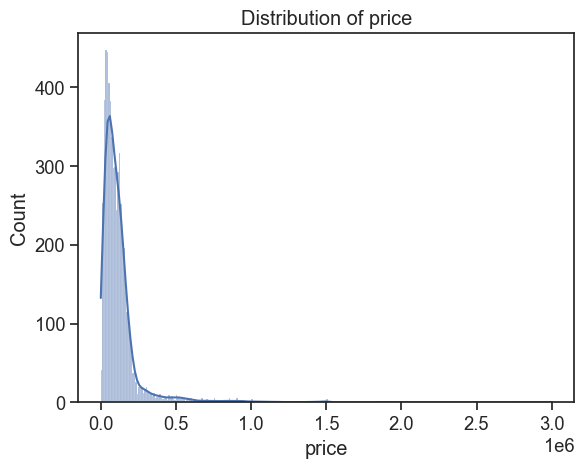

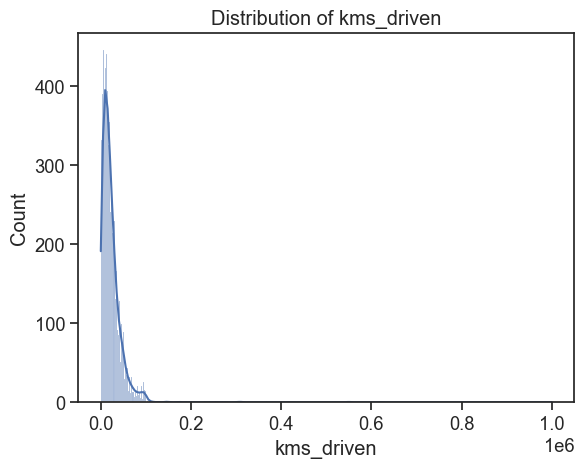

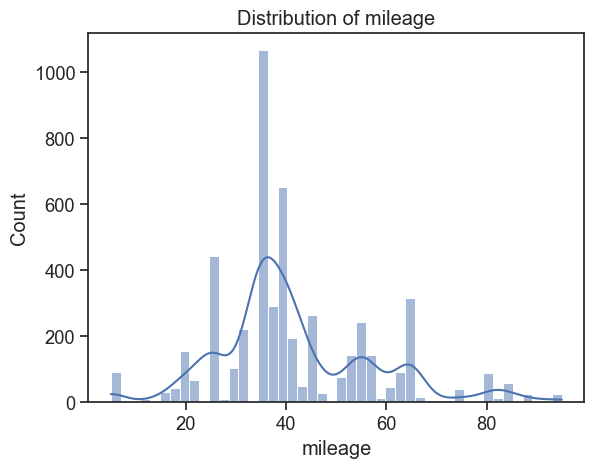

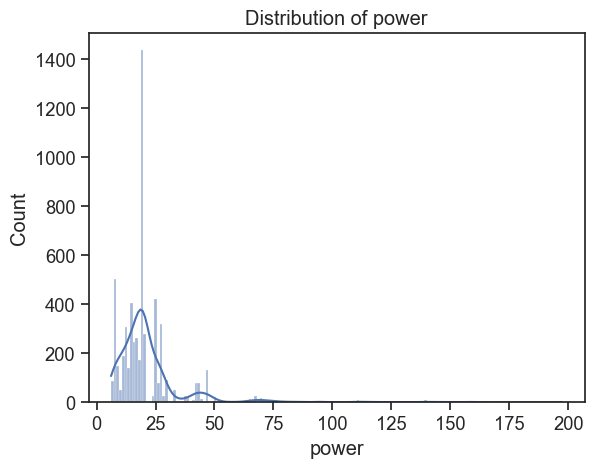

In [26]:


numerical_cols = ['price', 'kms_driven', 'mileage', 'power']

for col in numerical_cols:
    sns.histplot(df_cleaned[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [27]:
df_cleaned['price_log'] = np.log1p(df_cleaned['price'])
df_cleaned['kms_driven_log'] = np.log1p(df_cleaned['kms_driven'])

#Apply to mileage and power if they're skewed
df_cleaned['mileage_log'] = np.log1p(df_cleaned['mileage'])
df_cleaned['power_log'] = np.log1p(df_cleaned['power'])


In [38]:
#Standardizing numerical features
from sklearn.preprocessing import StandardScaler # type: ignore

scaler = StandardScaler()

df_cleaned[['price', 'kms_driven', 'mileage', 'power']] = scaler.fit_transform(
    df_cleaned[['price', 'kms_driven', 'mileage', 'power']]
)



4. Data Visualization

   a) Multivariate Plots

○ Pairplot or scatter matrix for all numerical columns to visualize
relationships.

○ Boxplots for categorical columns like brand and owner against price.

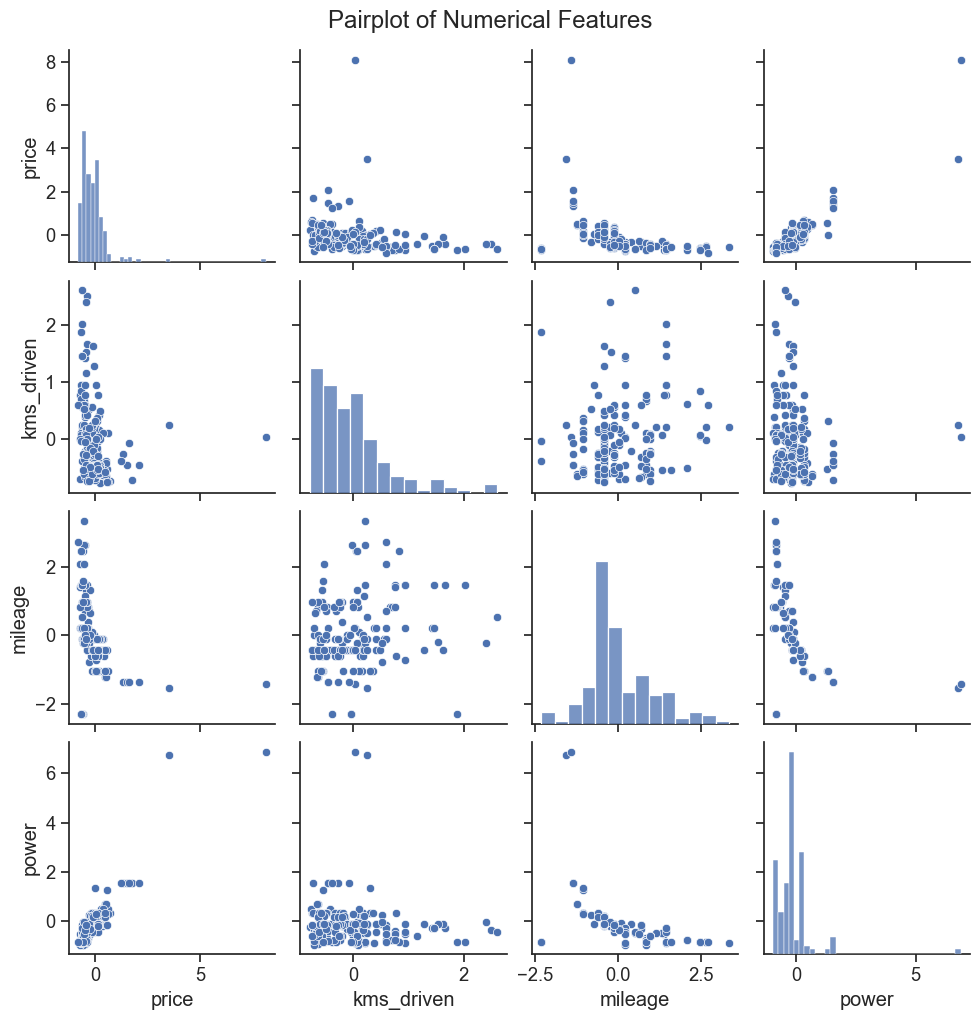

In [40]:
# Pairplot for selected features
# Select relevant numeric columns (you can use log-transformed ones if preferred)
num_cols = ['price', 'kms_driven', 'mileage', 'power']

# Optional: If dataset is large, use sample to reduce rendering time
sns.pairplot(df_cleaned[num_cols].sample(200))  # adjust sample size as needed
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [44]:
# Get all columns that start with 'brand_'
brand_columns = [col for col in df_cleaned.columns if col.startswith('brand_')]

# Recreate a 'brand' column from one-hot columns
df_cleaned['brand'] = df_cleaned[brand_columns].idxmax(axis=1).str.replace('brand_', '')


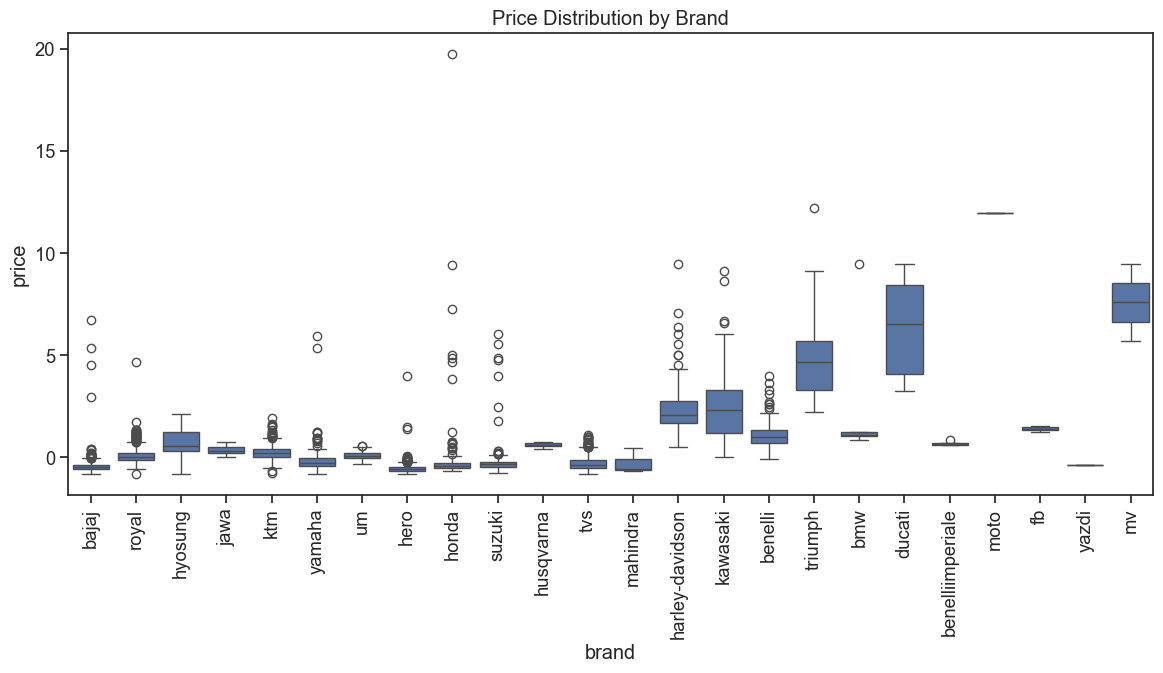

In [45]:
#Boxplot: Brand Vs Price

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned, x='brand', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Brand")
plt.show()


In [47]:
# Default all to 'First Owner' (assuming that was the base)
df_cleaned['owner'] = 'First Owner'

# Replace where other one-hot columns are 1
df_cleaned.loc[df_cleaned['owner_second owner'] == 1, 'owner'] = 'Second Owner'
df_cleaned.loc[df_cleaned['owner_third owner'] == 1, 'owner'] = 'Third Owner'
df_cleaned.loc[df_cleaned['owner_fourth owner or more'] == 1, 'owner'] = 'Fourth Owner or More'


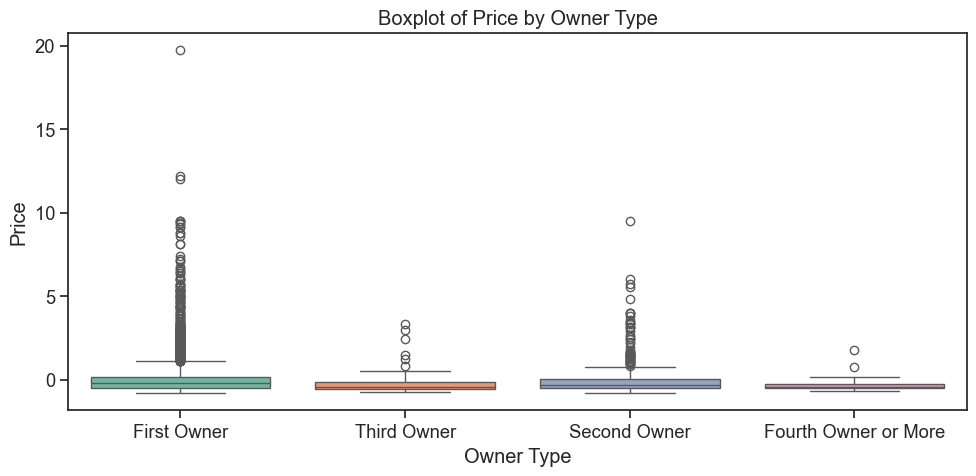

In [48]:
#Boxplot: Owner vs Price

plt.figure(figsize=(10, 5))
sns.boxplot(x='owner', y='price', data=df_cleaned, palette='Set2')
plt.title('Boxplot of Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Geographical Analysis

Use maps or barplots to show average bike prices by location

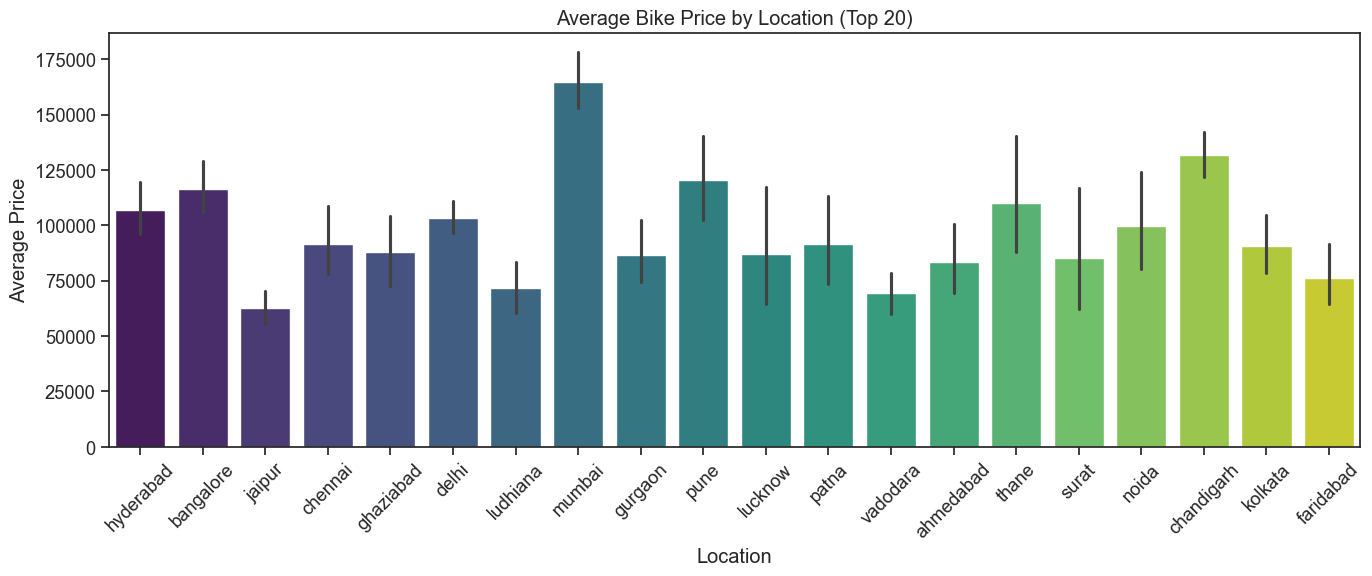

In [68]:
# Pick top 20 locations by frequency
top_locations = df['location'].value_counts().head(20).index
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(14, 6))
sns.barplot(x='location', y='price', data=df_top_locations, estimator='mean', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Bike Price by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()



Time Series Analysis

○ Analyze price trends over years if data has a temporal component.

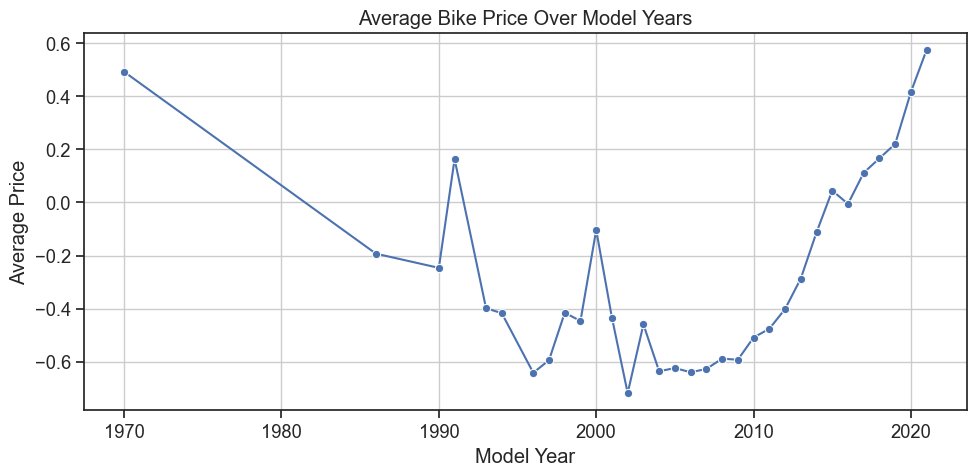

In [53]:
# Group by year and take mean price
yearly_price = df_cleaned.groupby('model_year')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='model_year', y='price', data=yearly_price, marker='o')
plt.title('Average Bike Price Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


5. Model Building

    1. Splitting Data

○ Separate features (X) and target variable (y, which is price).

○ Split the data into training and testing sets.
python

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

     2.Model Selection
○ Start with simple regression models like Linear Regression, Ridge, or
Lasso.

○ Experiment with tree-based models like Random Forest or Gradient
Boosting.

    3.Model Training and Evaluation
    
○ Train the models and use metrics like MAE, MSE, and R² to evaluate
performance.

In [ ]:
#Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
 #2. Split Features and Target
X = df_cleaned.drop(columns='price')
y = df_cleaned['price']


In [ ]:
#3.Identify Column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:
#4.Build Preprocessing pipelines
# For numerical features – fill missing values with mean
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# For categorical features – fill missing and one-hot encode
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [ ]:
#5.Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#6.Define and Train models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'R2 Score': round(r2, 2)
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


              Model   MAE   MSE  R2 Score
4  GradientBoosting  0.01  0.05      0.96
3      RandomForest  0.01  0.07      0.95
1             Ridge  0.14  0.40      0.68
2             Lasso  0.44  1.05      0.17
0  LinearRegression  0.43  3.97     -2.16


6.Hyperparameter Tuning

○ Use techniques like GridSearchCV for hyperparameter tuning to improve
model performance.

In [84]:
#1.Import Required models

from sklearn.model_selection import GridSearchCV


In [85]:
#2.Define Parameter grids

#Random forest

rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}


In [86]:
#Gradient Boosting

gb_params = {
    'model__n_estimators': [100, 150],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}


In [87]:
#3.Create Pipelines

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Pipelines
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])


In [88]:
#4.Perform Grid search

#Random Forest

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best Random Forest R²:", rf_grid.best_score_)
print("Best Parameters:", rf_grid.best_params_)


Best Random Forest R²: 0.9956036457258696
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [89]:
#Gradient Boosting

gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=3, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Best Gradient Boosting R²:", gb_grid.best_score_)
print("Best Parameters:", gb_grid.best_params_)


Best Gradient Boosting R²: 0.9966709129928418
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 150}


In [90]:
#5.Evaluate best model

# Choose the best model from GridSearch
best_model = rf_grid.best_estimator_  # or gb_grid.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.009238993078951185
MSE: 0.06910609124498242
R2 Score: 0.9450096333540962
